# Análise de gastos da UFCG em relação ao seu gasto

## Importando bibliotecas e preparando dados

In [36]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
orcamento_completo = pd.read_csv('../consulta_siop_orcamento_ufcg.csv')
orcamento_objetivo = orcamento_completo.iloc[:, 18:]
orcamento_objetivo['ano'] = orcamento_completo['ano']
orcamento_objetivo

,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
0,[valor não detalhado],0,7.686.431,14.586.431,0,0,0,2012
1,[valor não detalhado],0,22.956.997,22.956.997,0,0,0,2012
2,[valor não detalhado],0,38.666.570,38.666.570,0,0,0,2012
3,[valor não detalhado],21.584.508,0,0,0,0,0,2012
4,[valor não detalhado],38.666.570,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...
4958,[valor não detalhado],0,13.000,13.000,0,0,0,2023
4959,[valor não detalhado],13.000,0,0,0,0,0,2023
4960,[valor não detalhado],0,68.000,68.000,0,0,0,2023
4961,[valor não detalhado],68.000,0,0,0,0,0,2023


## Tratando os dados

In [38]:
objetivo_copia: pd.DataFrame = orcamento_objetivo.copy(deep=True)

for coluna in objetivo_copia.columns[1:-1]:
    objetivo_copia[coluna] = objetivo_copia[coluna].map(lambda value: value.replace(".",""))
    objetivo_copia[coluna] = objetivo_copia[coluna].astype('int64')

objetivo_copia


,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
0,[valor não detalhado],0,7686431,14586431,0,0,0,2012
1,[valor não detalhado],0,22956997,22956997,0,0,0,2012
2,[valor não detalhado],0,38666570,38666570,0,0,0,2012
3,[valor não detalhado],21584508,0,0,0,0,0,2012
4,[valor não detalhado],38666570,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...
4958,[valor não detalhado],0,13000,13000,0,0,0,2023
4959,[valor não detalhado],13000,0,0,0,0,0,2023
4960,[valor não detalhado],0,68000,68000,0,0,0,2023
4961,[valor não detalhado],68000,0,0,0,0,0,2023


In [39]:
monetario = [
    'projeto_de_lei', 
    'dotacao_inicial', 
    'dotacao_atual', 
    'empenhado', 
    'liquidado', 
    'pago'
]

alvo = [
    'objetivo',
    'ano'
]

In [40]:
objetivo_informacoes = objetivo_copia.groupby(alvo)[monetario].agg([
    sum, len, max, min, lambda col_monetaria: col_monetaria.mean()
])

objetivo_informacoes.rename(columns={'<lambda_0>':'media'}, inplace=True)
objetivo_informacoes

projeto_de_lei       \
                                                                   sum  len   
objetivo                                           ano                        
0582 - Expandir, interiorizar, democratizar e q... 2014        1598204   40   
                                                   2015        1511577   41   
0597 - Promover, em articulação com os sistemas... 2012         229892    4   
                                                   2013        1360240   16   
                                                   2014        1704881    8   
                                                   2015         642701    7   
0803 - Apoiar a formação de pessoal qualificado... 2012         461369   32   
                                                   2013        2324165   41   
                                                   2014        2011276   35   
                                                   2015        1252583   59   
0841 - Ampliar o acesso à educação superior com... 2012       74484103  270   
                                                   2013       84182086  371   
                                                   2014       93645202  262   
                                                   2015      107301602  263   
1009 - Ampliar o acesso à educação profissional... 2016        1903044   51   
                                                   2017        1541230   53   
                                                   2018        1229204   40   
                                                   2019        1659645   46   
1010 - Ampliar o acesso à educação superior de ... 2016      110671031  259   
                                                   2017      102848784  223   
                                                   2018       87532645  212   
                                                   2019       89416257  234   
1204 - Ampliar o acesso à educação profissional... 2020         982507   33   
                                                   2021         959417   46   
                                                   2022        1704567   36   
                                                   2023        1661362   21   
1237 - Fomentar a formação de pessoal qualifica... 2020       55953608  207   
                                                   2021       32587658  172   
                                                   2022       77579609  220   
                                                   2023       72887646  135   
[valor não detalhado]                              2012      304127438  151   
                                                   2013      315468518  124   
                                                   2014      381347718  114   
                                                   2015      422531400  123   
                                                   2016      478443148  146   
                                                   2017      542525837  136   
                                                   2018      564164581  135   
                                                   2019      591671792  119   
                                                   2020      578404832  130   
                                                   2021      366415747  147   
                                                   2022      664228115  107   
                                                   2023      679352320   94   

                                                                        \
                                                               max min   
objetivo                                           ano                   
0582 - Expandir, interiorizar, democratizar e q... 2014     576417   0   
                                                   2015     561060   0   
0597 - Promover, em articulação com os sistemas... 2012     227392   0   
                                                   2013 

## Interpretando os dados

A tabela acima tem todas as informações relacionadas ao objetivo e o ano em que esse objetivo ocorreu, mostrando a soma dos gastos, o máximo, mínimo, a quantidade de gastos e a média de gastos.

### Interpretando os índices



In [41]:
indices = objetivo_informacoes.reset_index().iloc[:,0]
objetivos = indices.unique()
objetivos

array(['0582 - Expandir, interiorizar, democratizar e qualificar a oferta...',
       '0597 - Promover, em articulação com os sistemas de ensino estaduais...',
       '0803 - Apoiar a formação de pessoal qualificado em nível superior...',
       '0841 - Ampliar o acesso à educação superior com condições de...',
       '1009 - Ampliar o acesso à educação profissional e tecnológica de...',
       '1010 - Ampliar o acesso à educação superior de qualidade, na...',
       '1204 - Ampliar o acesso à educação profissional e tecnológica, em...',
       '1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...',
       '[valor não detalhado]'], dtype=object)

In [42]:
ensino_superior = list()
formacao_profissional = list()

for objetivo in objetivos:
    if 'superior' in objetivo or 'oferta' in objetivo or 'ensino' in objetivo:
        ensino_superior.append(objetivo)
    elif 'profissional' in objetivo or 'qualificado' in objetivo:
        ensino_superior.append(objetivo)
    else: continue

ensino_superior + formacao_profissional

['0582 - Expandir, interiorizar, democratizar e qualificar a oferta...',
 '0597 - Promover, em articulação com os sistemas de ensino estaduais...',
 '0803 - Apoiar a formação de pessoal qualificado em nível superior...',
 '0841 - Ampliar o acesso à educação superior com condições de...',
 '1009 - Ampliar o acesso à educação profissional e tecnológica de...',
 '1010 - Ampliar o acesso à educação superior de qualidade, na...',
 '1204 - Ampliar o acesso à educação profissional e tecnológica, em...',
 '1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...']

Vamos identificar cada Objetivo como seu respectivo ID, ou seja, o número a esquerda. Nosso objetivo será encontrar os anos em que cada objetivo foram registrados, identificando assim um possível padrão de gastos e o histórico. 

* 0052 - 2014 e 2015;
* 0597 - 2012, 2013, 2014 e 2015;
* 0803 - 2012, 2013, 2014 e 2015;
* 0841 - 2012, 2013, 2014 e 2015;
* 1009 - 2016, 2017, 2018 e 2019;
* 1010 - 2016, 2017, 2018 e 2019;
* 1204 - 2020, 2021, 2022 e 2023;
* 1237 - 2020, 2021, 2022 e 2023;
* [valor não detalhado] - 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023


### Conclusões

1. Não detalhar o valor é algo extremamente comum em conjuntos de dados, visto que eles ocorrem quando não é pensado ou por falha na obtenção da tabela. Com isso, esse valor não detalhado estar presente em todos os anos é o esperado; 
2. Os objetivos se repetem, justamente por serem os mesmos mas com nomeclaturas diferentes. Logo, só existem dois objetivos principais a serem vistos em cada ano: investimento no ensino superior e na formação profissional, existindo variações da descrição a partir da natureza mais específica do investimento.

### Interpretando os gastos

In [43]:
# Separando cada objetivo em um dataFrame próprio

objetivo_0052 = objetivo_informacoes.reset_index().iloc[:2,1:]
objetivo_0052.index = objetivo_0052.iloc[:,0]
objetivo_0052.drop(columns=['ano'], inplace=True)
objetivo_0597 = objetivo_informacoes.reset_index().iloc[2:6,1:]
objetivo_0597.index = objetivo_0597.iloc[:,0]
objetivo_0597.drop(columns=['ano'], inplace=True)
objetivo_0803  = objetivo_informacoes.reset_index().iloc[6:10,1:]
objetivo_0803.index = objetivo_0803.iloc[:,0]
objetivo_0803.drop(columns=['ano'], inplace=True)
objetivo_0841 = objetivo_informacoes.reset_index().iloc[10:14,1:]
objetivo_0841.index = objetivo_0841.iloc[:,0]
objetivo_0841.drop(columns=['ano'], inplace=True)
objetivo_1009  = objetivo_informacoes.reset_index().iloc[14:18,1:]
objetivo_1009.index = objetivo_1009.iloc[:,0]
objetivo_1009.drop(columns=['ano'], inplace=True)
objetivo_1010  = objetivo_informacoes.reset_index().iloc[18:22,1:]
objetivo_1010.index = objetivo_1010.iloc[:,0]
objetivo_1010.drop(columns=['ano'], inplace=True)
objetivo_1204 = objetivo_informacoes.reset_index().iloc[22:26,1:]
objetivo_1204.index = objetivo_1204.iloc[:,0]
objetivo_1204.drop(columns=['ano'], inplace=True)
objetivo_1237 = objetivo_informacoes.reset_index().iloc[26:30,1:]
objetivo_1237.index = objetivo_1237.iloc[:,0]
objetivo_1237.drop(columns=['ano'], inplace=True)
objetivo_nao_detalhado = objetivo_informacoes.reset_index().iloc[30:,1:]
objetivo_nao_detalhado.index = objetivo_nao_detalhado.iloc[:,0]
objetivo_nao_detalhado.drop(columns=['ano'], inplace=True)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20740\3787848709.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0052.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20740\3787848709.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0597.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20740\3787848709.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0803.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20740\3787848709.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0841.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20740\3787848709.py:17: Perf

In [44]:
colunas_alvo_soma = [
    ('projeto_de_lei','sum'),
    ('dotacao_inicial','sum'),
    ('dotacao_atual','sum'),
    ('empenhado','sum'),
    ('liquidado','sum'),
    ('pago','sum')
]

colunas_alvo_media = [
    ('projeto_de_lei','media'),
    ('dotacao_inicial','media'),
    ('dotacao_atual','media'),
    ('empenhado','media'),
    ('liquidado','media'),
    ('pago','media')
]

<Axes: xlabel="('ano', '')">

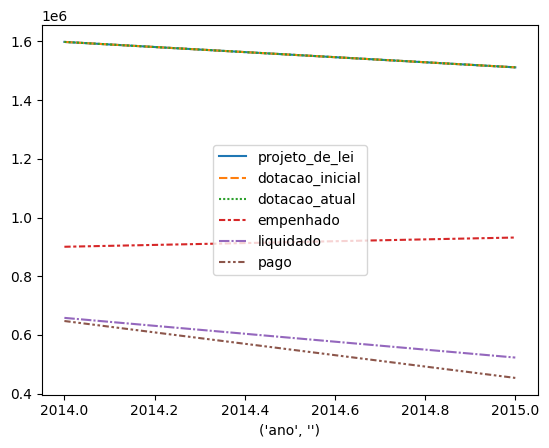

In [45]:
sns.lineplot(objetivo_0052[colunas_alvo_soma])

<Axes: >

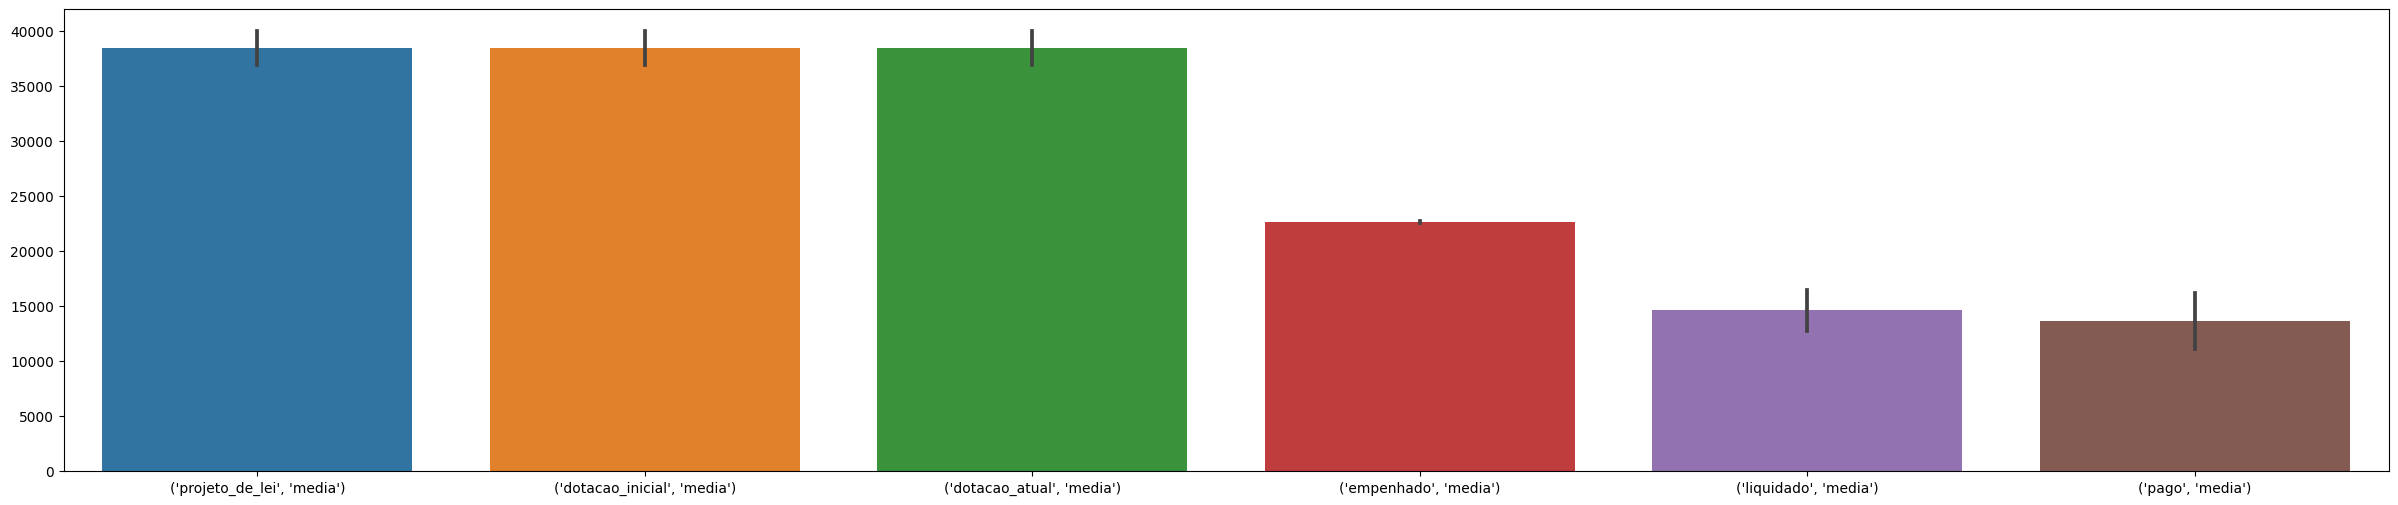

In [47]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_0052[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

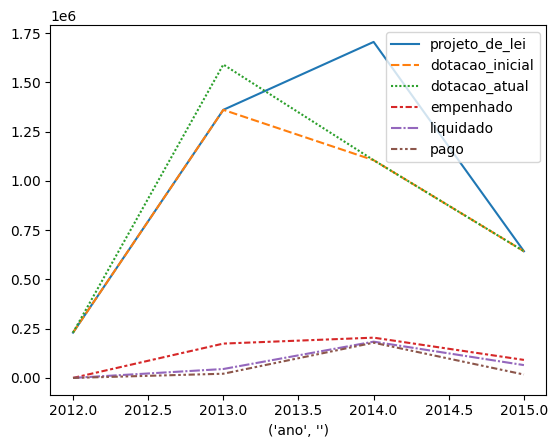

In [48]:
sns.lineplot(objetivo_0597[colunas_alvo_soma])''

<Axes: >

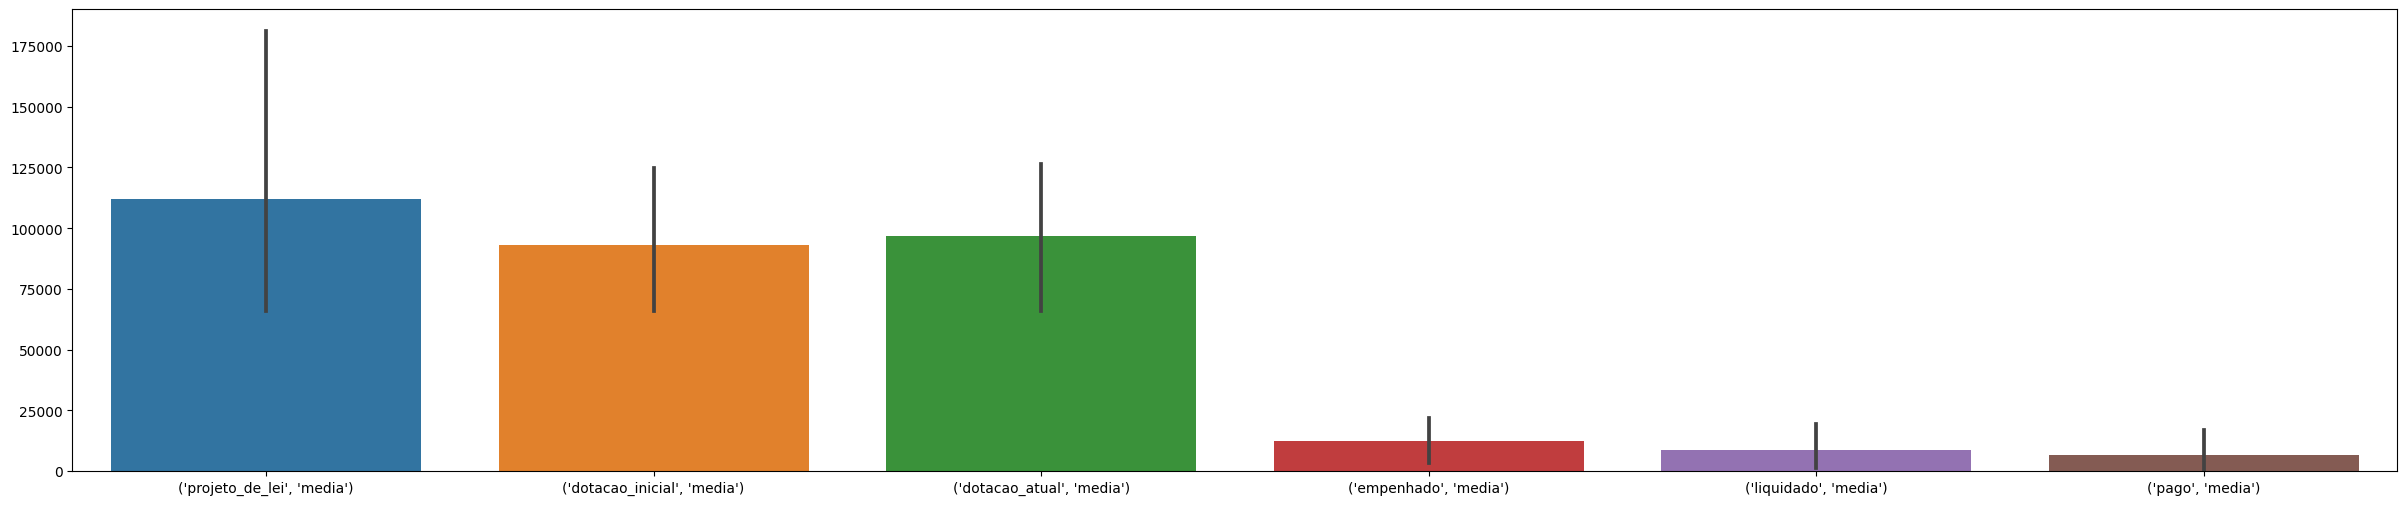

In [57]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_0597[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

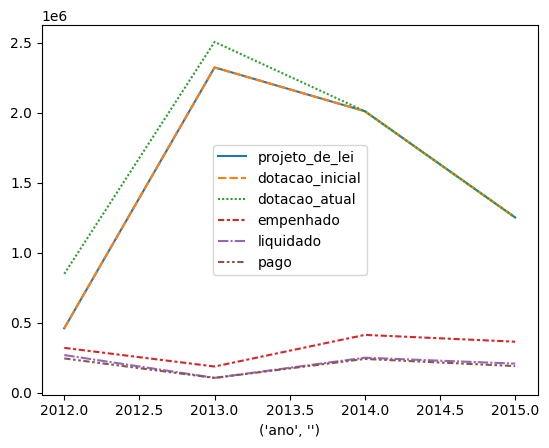

In [59]:
sns.lineplot(objetivo_0803[colunas_alvo_soma])

<Axes: >

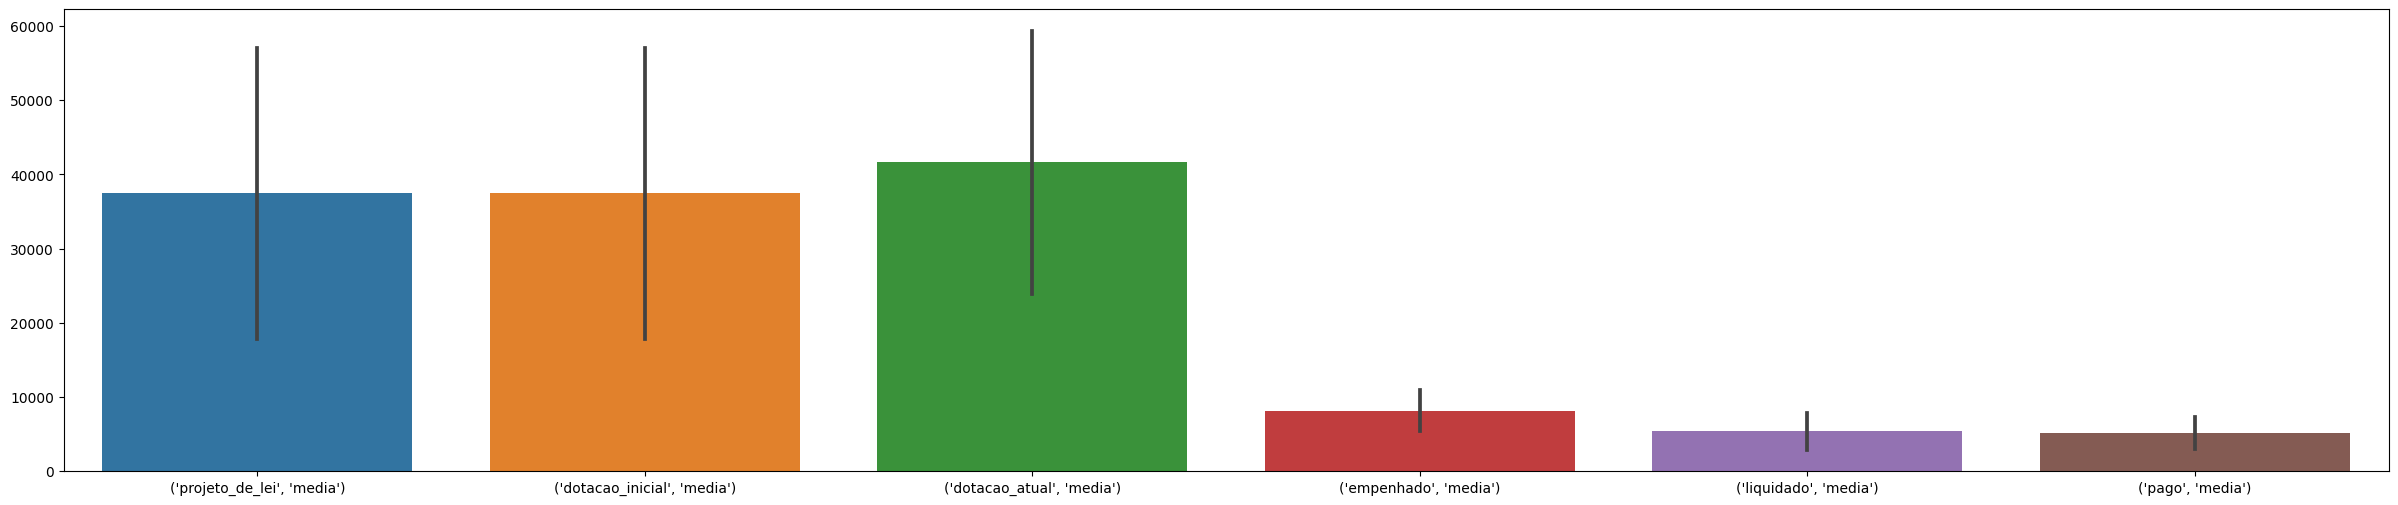

In [60]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_0803[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

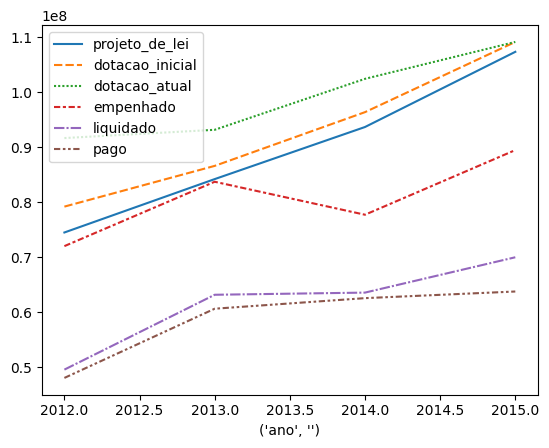

In [61]:
sns.lineplot(objetivo_0841[colunas_alvo_soma])

<Axes: >

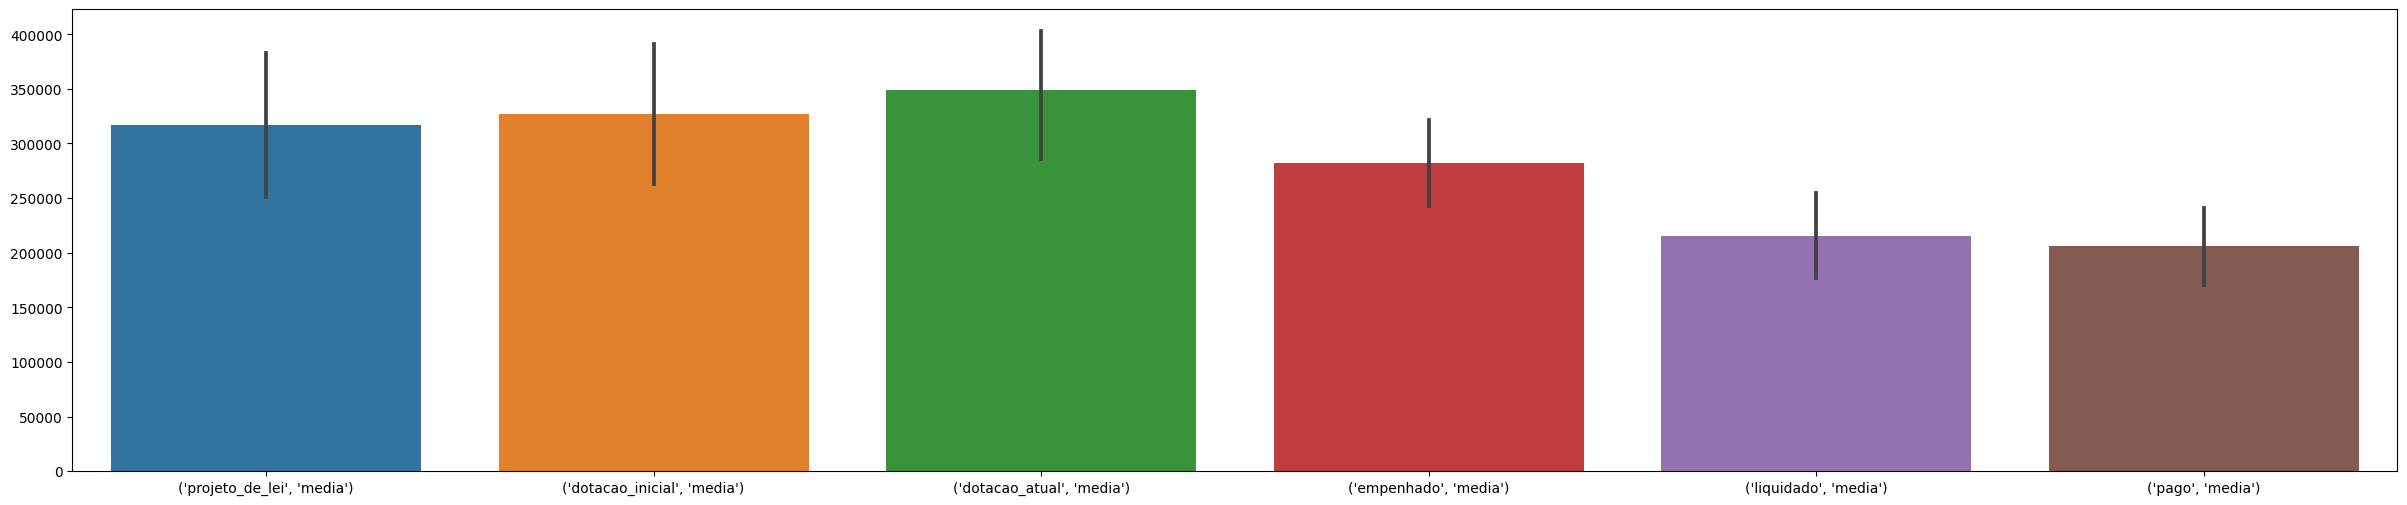

In [62]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_0841[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

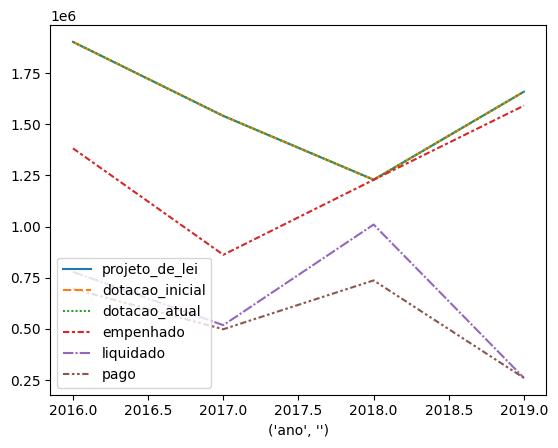

In [63]:
sns.lineplot(objetivo_1009[colunas_alvo_soma])

<Axes: >

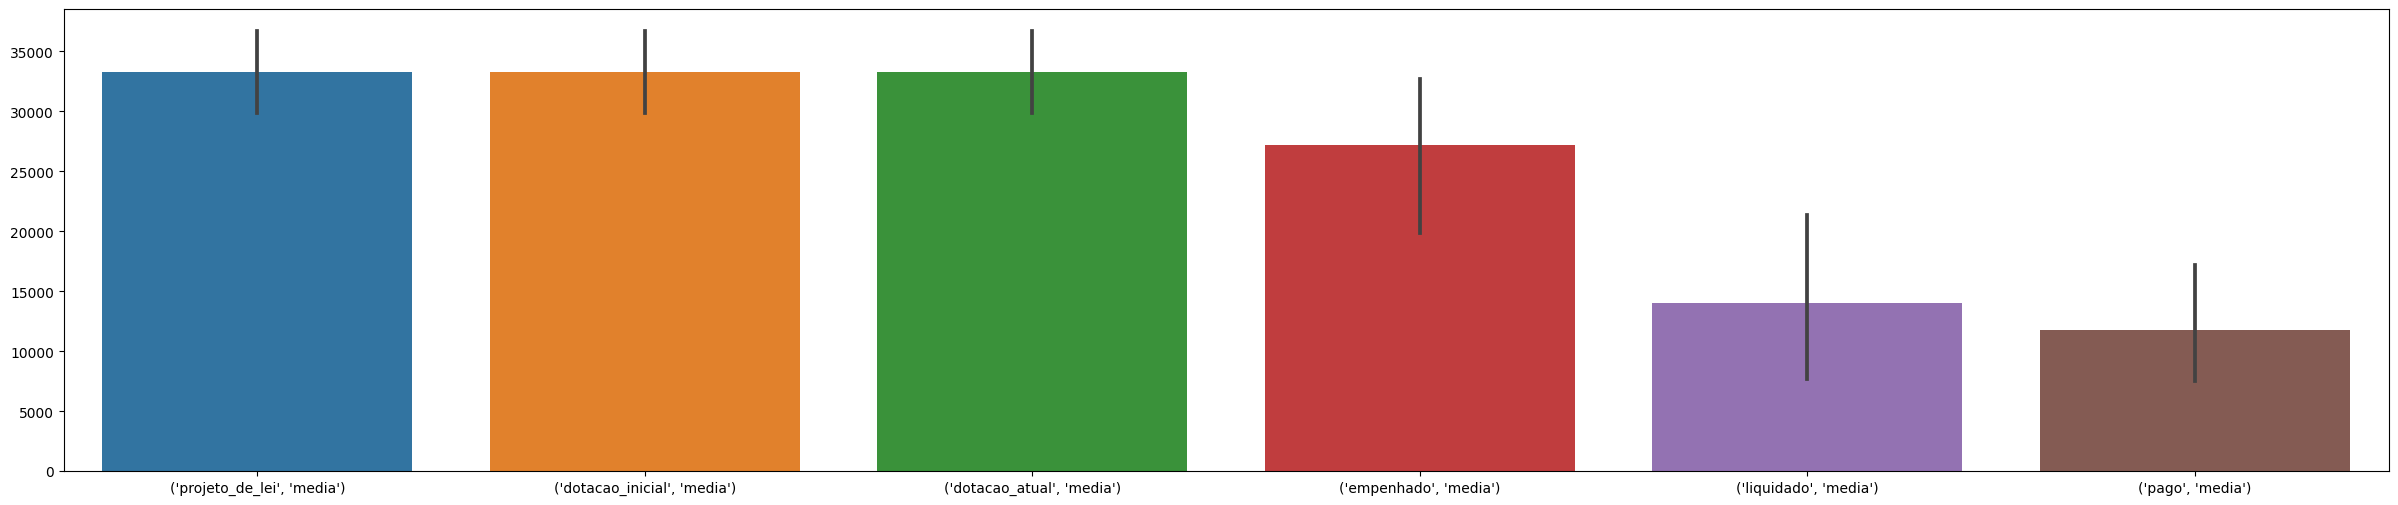

In [64]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_1009[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

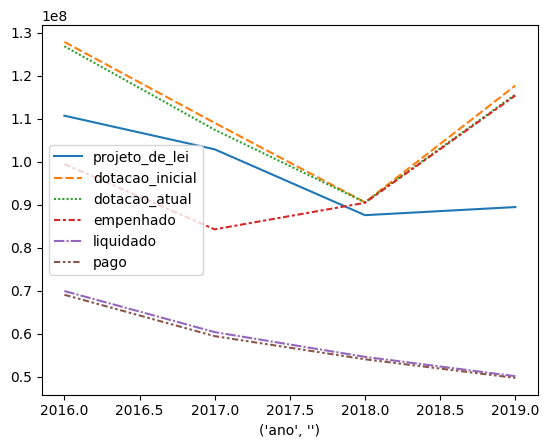

In [69]:
sns.lineplot(objetivo_1010[colunas_alvo_soma])

<Axes: >

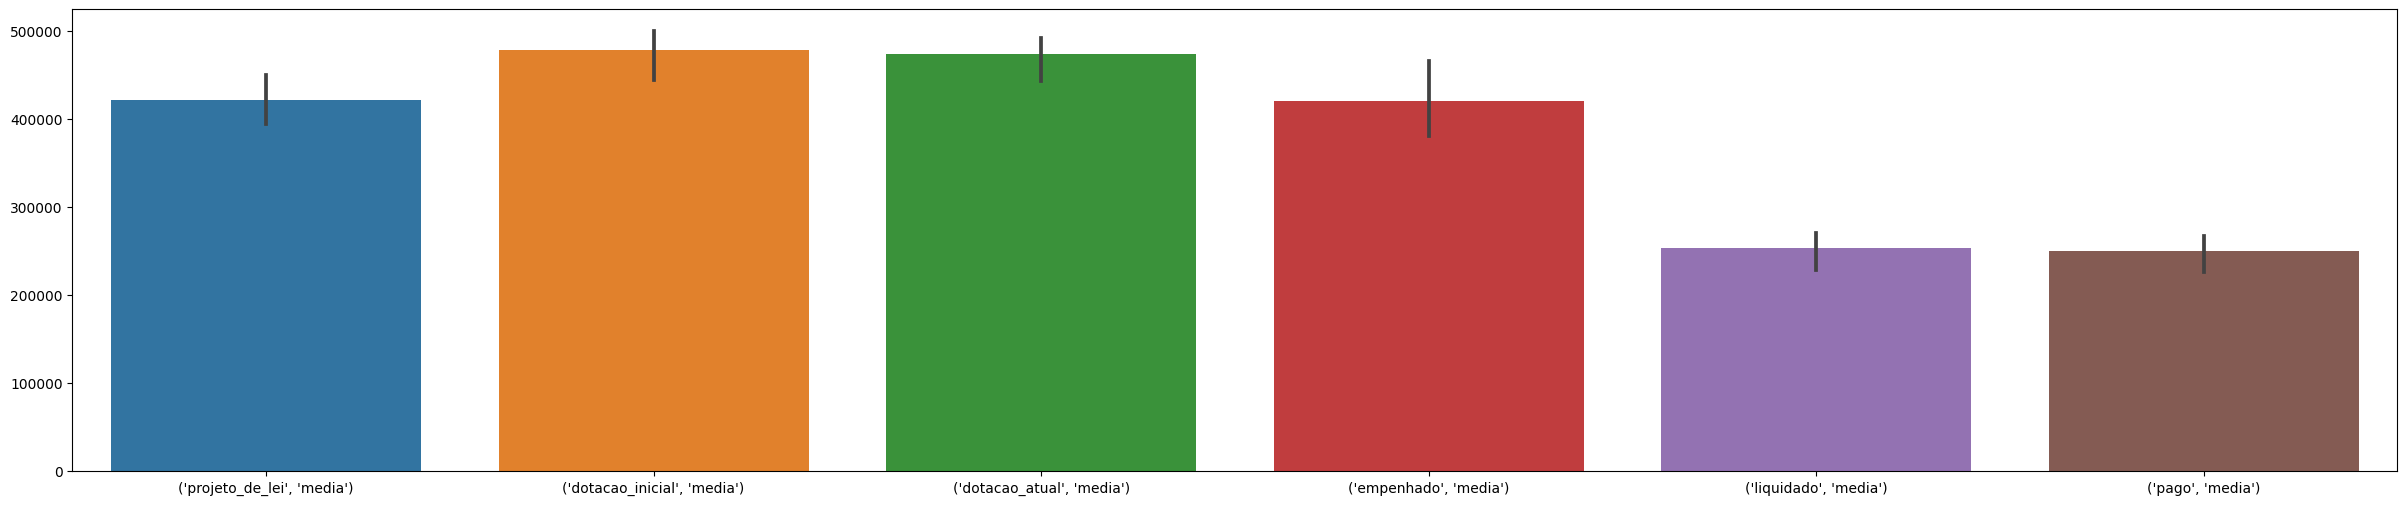

In [70]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_1010[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

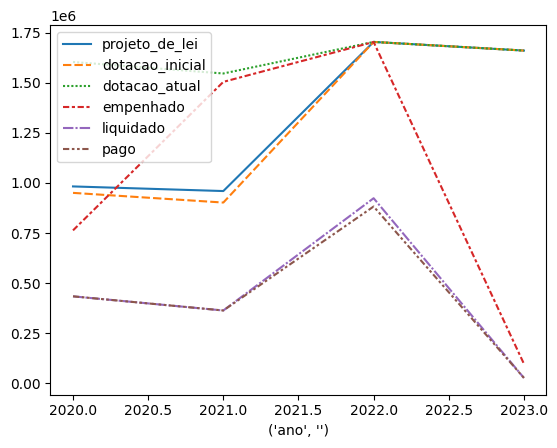

In [71]:
sns.lineplot(objetivo_1204[colunas_alvo_soma])

<Axes: >

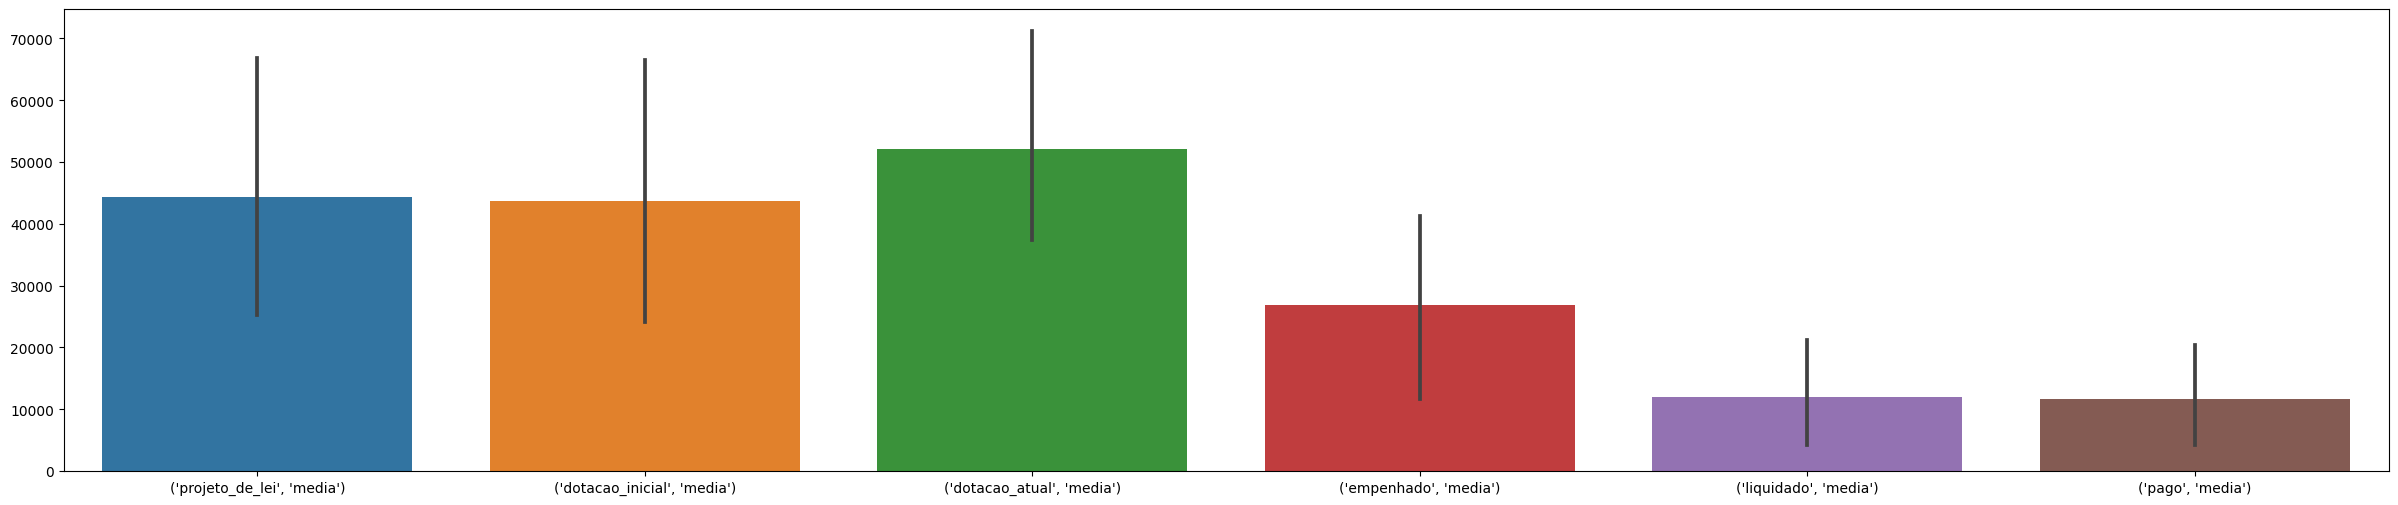

In [72]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_1204[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

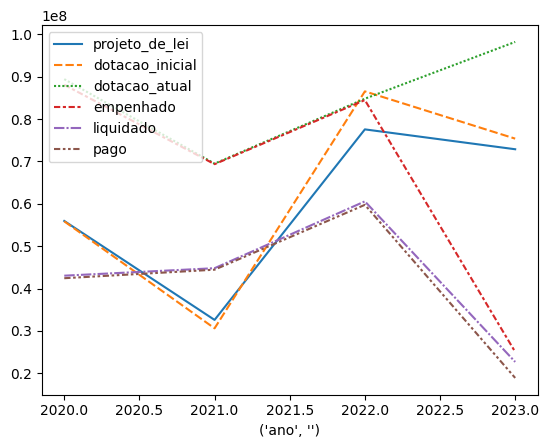

In [73]:
sns.lineplot(objetivo_1237[colunas_alvo_soma])

<Axes: >

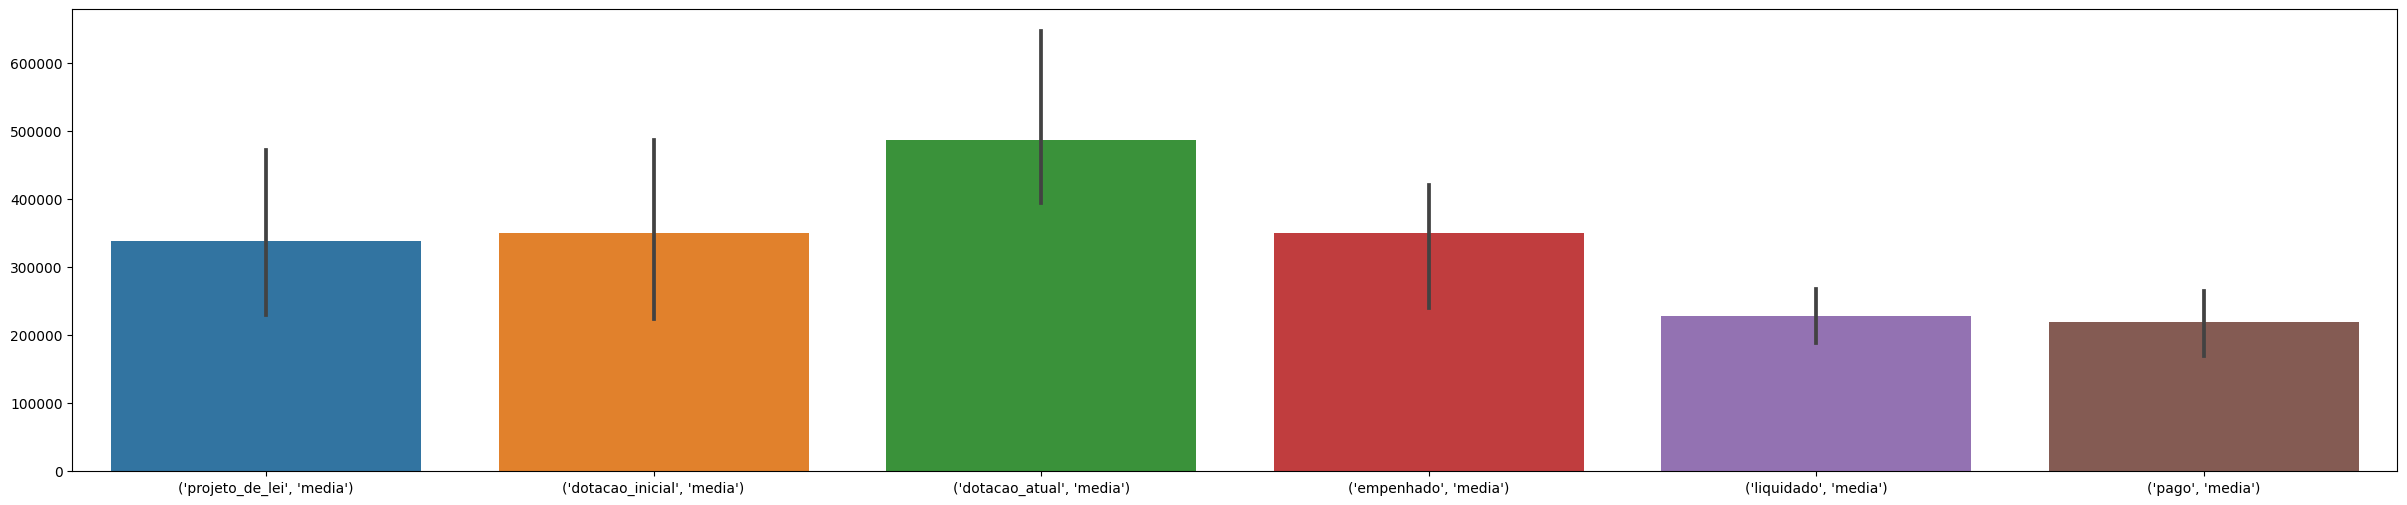

In [74]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_1237[colunas_alvo_media])

<Axes: xlabel="('ano', '')">

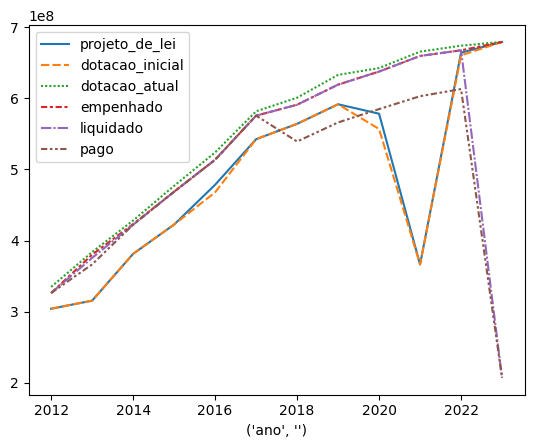

In [75]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_soma])

<Axes: >

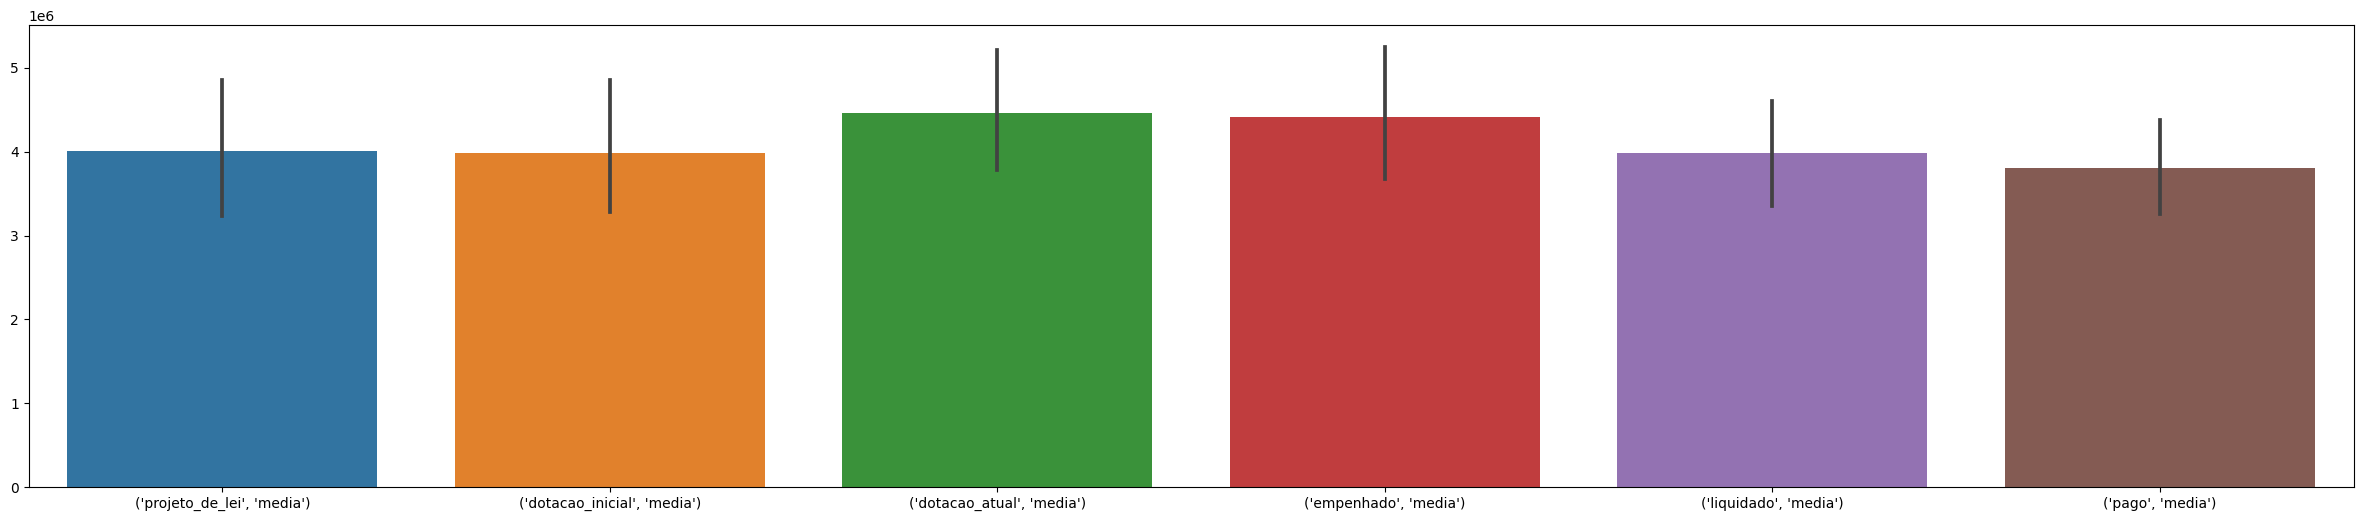

In [76]:
plt.figure(figsize=(30,6))
sns.barplot(objetivo_nao_detalhado[colunas_alvo_media])